<a href="https://colab.research.google.com/github/tsvetaevAlex/Applicant/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22tsvetaev_alexWorkspace_ipynb%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цветаев Александр Александрович Группа ДА-602/2025


# Задачи для исследования данных о клиентах банка

## 1. агрузка и проверка данных
<br>1.1. Загрузка и проверка данных Загрузите таблицу из CSV-файла
<br>1.2. Посмотрите, сколько всего клиентов и столбцов в таблице
<br>1.3. Проверьте, есть ли пустые ячейки или повторяющиеся клиенты
# 2. Анализ данных через SQL-запросы
<br>2.1. Сколько клиентов в каждой стране?
<br>2.2. Подсчитайте количество клиентов в каждой стране
<br>2.3. Найдите средний баланс клиентов в каждой стране
### 3. Какие клиенты самые активные?
<br>3.1. Разделите клиентов на возрастные группы:
<br>3.2. молодые (18-30);
<br>3.3. средний возраст (31-45);
<br>3.4. зрелые (46-60);
<br>3.5. пожилые (60+);
### 4. Какие клиенты самые активные? клиентов в каждой группе
<br>4.1. Сколькими продуктами пользуются клиенты?
<br>4.2. Узнайте, у скольких клиентов 1, 2, 3 или 4 продукта
Найдите средний баланс для клиентов с разным количеством продуктов
Задача
# 3: Создание графиков
3.1 Откуда клиенты?
3.2.1. Круговая диаграмма: покажите долю клиентов из каждой страны
3.2.1. Столбчатая диаграмма: покажите распределение по возрасту
3.3 Кто богаче?
3.3.1. Точечный график: покажите связь между возрастом и балансом
3.4 Кто активнее?
3.4.1. Столбчатая диаграмма: процент активных клиентов в каждой стране
3.4.2. Сравнительная диаграмма: средний баланс активных и неактивных клиентов

# Задача 4: Напишите выводы о проведенном исследовании

```
--- ✀ Cut Line -----------------------------------------------------------------
```

# Задача 1.1 Создаем базу данных в Google Colab из CSV файла


 ## 1. ШАГ 1. Загружаем исходный файл с данными `Churn.csv` в рабочее пространство Google Colab

```
для увеличения  стабильность работы и автономности
файл с исходными данными `Churn.csv`
згружен в pivate google drive и будет загружен в Google Colab по прямой открытой ссылке.
```

In [ ]:
# @title
import requests

print("Prepare for downloading file Churn.csv feom Google Drive.")
file_id = "1CGeTbbvhjfCjbDjuQq6BDbTc0YqHdJER" #shared file ID at my own google drive
url = f"https://drive.google.com/uc?export=download&id={file_id}"# full direct URL

r = requests.get(url)
open("Churn.csv", "wb").write(r.content)

print("File Churn.csv! Downloaded and included info Colab filesystem")

Prepare for downloading file Churn.csv feom Google Drive.
File Churn.csv! Downloaded and included info Colab filesystem


## Шаг 2. Импортируйем CSV в Pandas



In [ ]:

import pandas as pd

df = pd.read_csv("Churn.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Churn.csv shoud be uploaded, you can verify it exists<br>at Files tab (from left side navigation panel)

now we cam open it with panda
```
import pandas as pd
df = pd.read_csv("Churn.csv")
df.head()
```

## Шаг2.1. Создаём базу данных в памяти

In [ ]:
print (" Создаём базу данных в памяти: Customers.db")
import sqlite3
conn = sqlite3.connect(":Customers.db")

 Создаём базу данных в памяти: Customers.bd



#  Импортируем датафрейм как таблицу "Customers"
df.to_sql("Customers", conn, if_exists="replace", index=False)

## я указываю одним из параметров 'index=False'<br>
**Параметр:** `index=False`<br>
онтролирует, будет ли в DataFrame добавлен индекс
 как отдельный столбец `index`, в таблицу базы данных,
 он работает аналогично `AUTO_INCREMENT`
<br>в базе появится лишний столбец **`index`**,
<br>который нам сейчас **не нужен**.
<br>Tак как  в исходном  `CSV` уже есть свой уникальный идентификатор,  `CustomerId`.


In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Create SQLite database (or open existing)
engine = create_engine("sqlite:///mydb.sqlite")

# Load CSV
df = pd.read_csv("Churn.csv")

# Write dataframe to table "Customers"
df.to_sql("Customers", engine, if_exists="replace", index=False)


10000


# # Шаг2.2.  Импортируем датафрейм как таблицу "Customers"
```
df.to_sql("Customers", conn, if_exists="replace", index=False)
```
## я указываю одним из параметров 'index=False'<br>
**Параметр:** `index=False`<br>
контролирует, будет ли в DataFrame добавлен индекс как отдельный столбец **`index`**, в таблицу базы данных, он работает аналогично `AUTO_INCREMENT PRIMARY KEY`
<br>в базе появится лишний столбец **`index`**,
<br>который нам сейчас **не нужен**, так как  в исходном  `CSV` уже есть свой уникальный идентификатор,  `CustomerId`.


# шаг 3. Теперь можно выполнять SQL-запросы прямо в Colab


###Подсчитайте количество клиентов в каждой стране
```
SELECT Geography, COUNT(*) AS ClientsCount
FROM Customers
GROUP BY Geography;
```

In [ ]:
df.groupby("Geography").size()

,0
Geography,
France,5014
Germany,2509
Spain,2477


###Найдите средний баланс клиентов в каждой стране



In [ ]:
query = """
SELECT Geography,
       AVG(Balance) AS AvgBalance
FROM Customers
GROUP BY Geography
"""
pd.read_sql_query(query, conn)

,Geography,AvgBalance
0,France,62092.636516
1,Germany,119730.116134
2,Spain,61818.147763


In [ ]:
import sqlite3

conn = sqlite3.connect("mydb.sqlite")
cursor = conn.cursor()

# Список всех таблиц
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print([table[0] for table in tables])


['Customers']


#### Сгруппировать по стране и посчитать количество активных клиентов

In [ ]:
# Сгруппировать по стране и посчитать количество активных клиентов
active_per_country = df.groupby("Geography")["IsActiveMember"].sum()
print(active_per_country)

Geography
France     2591
Germany    1248
Spain      1312
Name: IsActiveMember, dtype: int64


### Разделите клиентов на возрастные группы: молодые (18-30), средний возраст (31-45), зрелые (46-60), пожилые (60+)


In [ ]:
# Функция для возрастной группы
def age_group(age):
    if 18 <= age <= 30:
        return "Young (18-30)"
    elif 31 <= age <= 45:
        return "Middle (31-45)"
    elif 46 <= age <= 60:
        return "Mature (46-60)"
    else:
        return "Senior (60+)"

In [ ]:
df[["Age", "AgeGroup"]].head()

,Age,AgeGroup
0,42,Middle (31-45)
1,41,Middle (31-45)
2,42,Middle (31-45)
3,39,Middle (31-45)
4,43,Middle (31-45)


### Считаем общее количество и количество активных

In [ ]:
#
grouped = df.groupby("AgeGroup")["IsActiveMember"]
percent_active = (grouped.sum() / grouped.count() * 100).round(2)

print(percent_active)

AgeGroup
Mature (46-60)    52.22
Middle (31-45)    49.15
Senior (60+)      80.82
Young (18-30)     51.12
Name: IsActiveMember, dtype: float64


### Сколько продуктов используют клиенты

In [ ]:
product_counts = df["NumOfProducts"].value_counts().sort_index()
print(product_counts)

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


# Задача 3: Построение графиков


## 3.1 Откуда клиенты

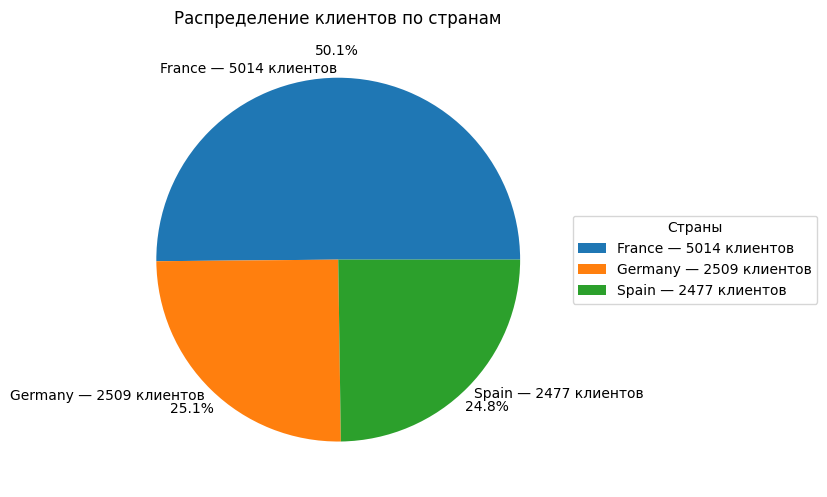

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Загрузка CSV ---
df = pd.read_csv("/content/Churn.csv")

# --- Подсчёт количества клиентов по странам ---
geo_counts = df["Geography"].value_counts()

# Подготовка подписей: "France — 421 клиентов"
labels = [f"{country} — {count} клиентов" for country, count in geo_counts.items()]

# --- Построение круговой диаграммы ---
plt.figure(figsize=(8,8))

wedges, texts, autotexts = plt.pie(
    geo_counts,
    labels=labels,
    autopct=lambda pct: f"{pct:.1f}%",  # процент
    pctdistance=1.15,                   # проценты вынести наружу
    labeldistance=1.05                  # подписи вынести наружу
)

# Легенда
plt.legend(
    wedges,
    labels,
    title="Страны",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Распределение клиентов по странам")
plt.tight_layout()
plt.show()



###Точечный график: покажите связь между возрастом и балансом


/tmp/ipython-input-1455609736.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('AgeGroup')[['Balance', 'EstimatedSalary']].mean().reset_index()


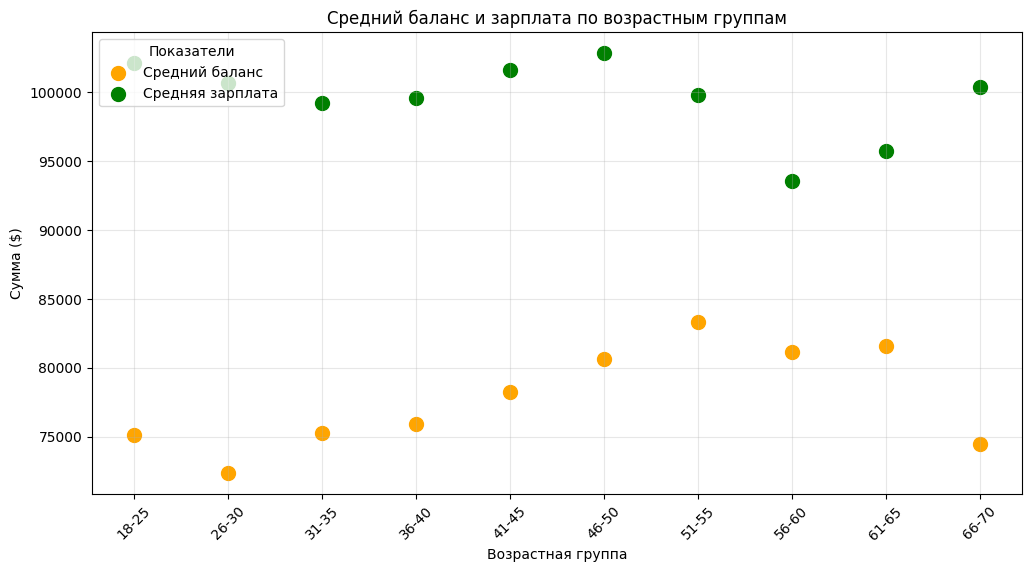

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем CSV
df = pd.read_csv("/content/Churn.csv")

# Создаем возрастные группы
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
labels = ['18-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Группируем по возрастным группам и считаем средние
grouped = df.groupby('AgeGroup')[['Balance', 'EstimatedSalary']].mean().reset_index()

# Точечный график по усредненным данным
plt.figure(figsize=(12,6))
plt.scatter(grouped['AgeGroup'], grouped['Balance'], color='orange', s=100, label='Средний баланс')
plt.scatter(grouped['AgeGroup'], grouped['EstimatedSalary'], color='green', s=100, label='Средняя зарплата')
plt.title('Средний баланс и зарплата по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Сумма ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Легенда с заголовком и расположением справа
plt.legend(title='Показатели', loc='upper left')
plt.show()



###Кто активнее? с группировкой по странам
### c легендой процентами и абсолютными значениями

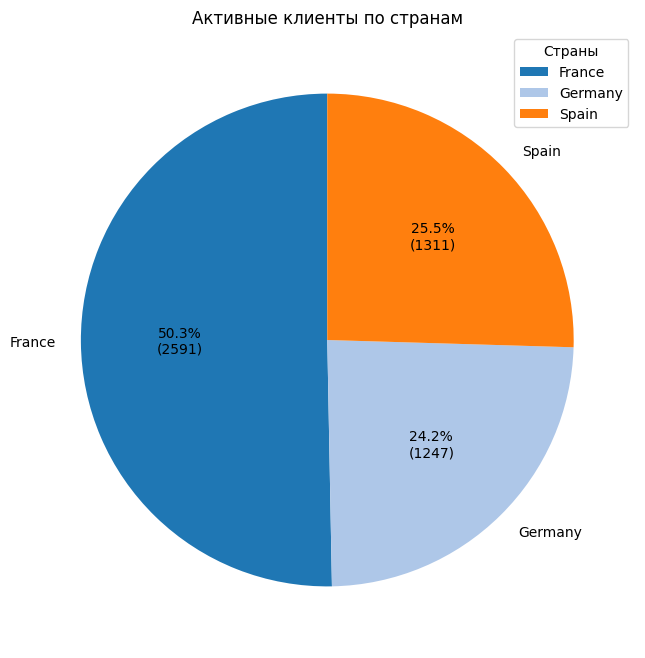

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем CSV
df = pd.read_csv("/content/Churn.csv")

# Фильтруем только активных клиентов
active_df = df[df['IsActiveMember'] == 1]

# Группируем по странам
active_by_country = active_df.groupby('Geography')['IsActiveMember'].count()

# Построение пирога
plt.figure(figsize=(8,8))
plt.pie(
    active_by_country,
    labels=active_by_country.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p/100*active_by_country.sum())})',
    startangle=90,
    colors=plt.cm.tab20.colors
)
plt.title('Активные клиенты по странам')
plt.legend(title='Страны', loc='upper right')
plt.show()



### Столбчатая диаграмма: процент активных клиентов в каждой стране

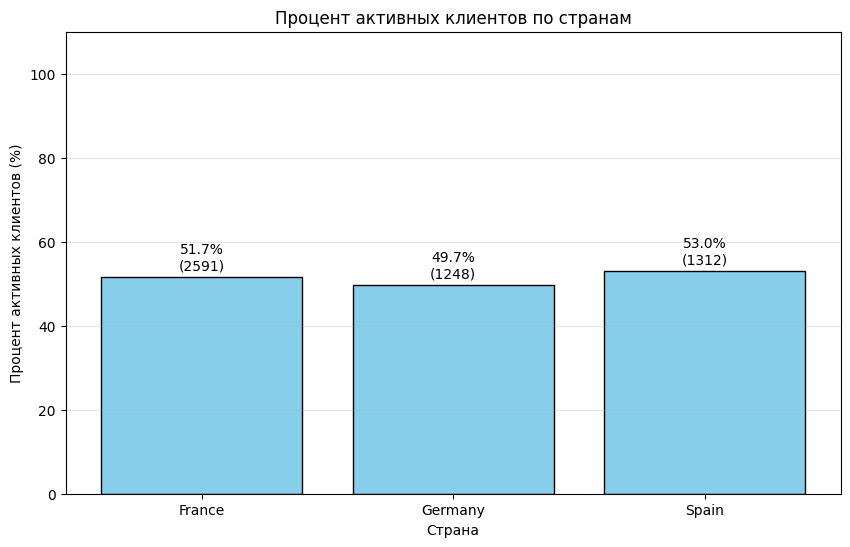

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем CSV
df = pd.read_csv("/content/Churn.csv")

# Группируем по странам и считаем активных и всего клиентов
country_group = df.groupby('Geography').agg(
    total_clients=('CustomerId', 'count'),
    active_clients=('IsActiveMember', 'sum')
).reset_index()

# Вычисляем процент активных клиентов
country_group['active_percent'] = country_group['active_clients'] / country_group['total_clients'] * 100

# Строим столбчатую диаграмму
plt.figure(figsize=(10,6))
bars = plt.bar(
    country_group['Geography'],
    country_group['active_percent'],
    color='skyblue',
    edgecolor='black'
)

# Добавляем подписи с процентами и абсолютными числами
for bar, percent, abs_count in zip(bars, country_group['active_percent'], country_group['active_clients']):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        f'{percent:.1f}%\n({abs_count})',
        ha='center', va='bottom'
    )

plt.title('Процент активных клиентов по странам')
plt.ylabel('Процент активных клиентов (%)')
plt.xlabel('Страна')
plt.ylim(0, 110)
plt.grid(axis='y', alpha=0.3)
plt.show()


### Сравнительная диаграмма: средний баланс активных и неактивных клиентов с легендой процентами и абсолютными значениями

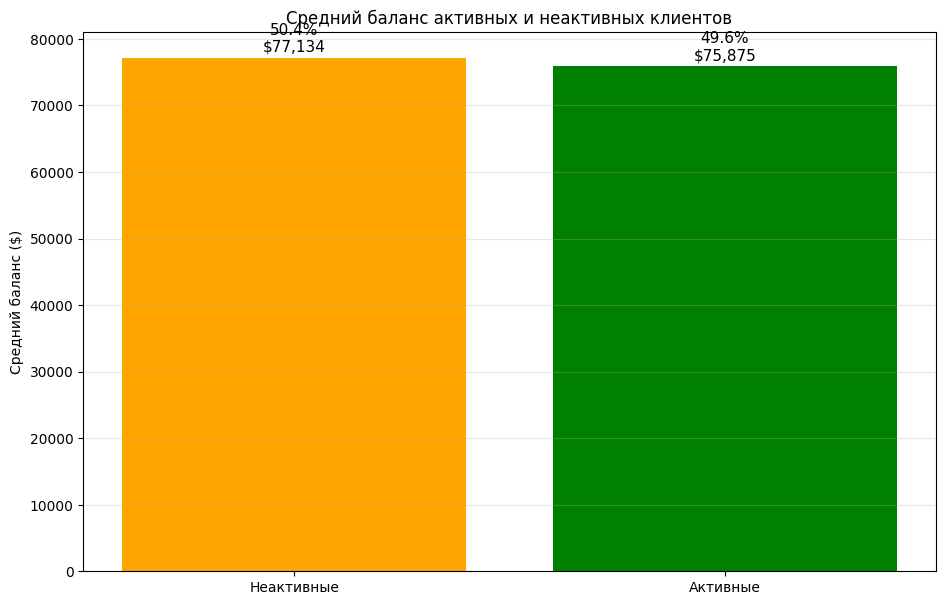

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем CSV
df = pd.read_csv("/content/Churn.csv")

# Группируем по активности и считаем средний баланс
balance_by_activity = df.groupby('IsActiveMember')['Balance'].mean().reset_index()
balance_by_activity['Label'] = balance_by_activity['IsActiveMember'].map({0: 'Неактивные', 1: 'Активные'})

# Считаем долю в процентах относительно общего среднего баланса
total_balance = balance_by_activity['Balance'].sum()
balance_by_activity['Percent'] = balance_by_activity['Balance'] / total_balance * 100

# Построение столбчатой диаграммы
plt.figure(figsize=(11,7))
bars = plt.bar(
    balance_by_activity['Label'],
    balance_by_activity['Balance'],
    color=['orange','green']
)

# Добавляем подписи с процентами и абсолютными значениями
for bar, percent, value in zip(bars, balance_by_activity['Percent'], balance_by_activity['Balance']):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 500,
        f'{percent:.1f}%\n${value:,.0f}',
        ha='center', va='bottom', fontsize=11
    )

plt.title('Средний баланс активных и неактивных клиентов')
plt.ylabel('Средний баланс ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()


#  Выводы: